In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from scipy.misc import imread

#import tensorflow as tf
sns.set()

# Trying to process some loops in parallel to make things faster
from joblib import Parallel, delayed
import multiprocessing

import os
print(os.getcwd())

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

/home/ubuntu/cs412-protein-analysis


In [5]:
# Check to see if Tensorflow will use GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# Check to see if Keras will use GPU
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11823812084426750145
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 1819045255055358101
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17588325947029595037
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11281553818
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16276287335612523477
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"
]


['/job:localhost/replica:0/task:0/device:GPU:0']

In [6]:
train_labels = pd.read_csv("../data/train.csv")
train_labels.head(10)

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18
5,001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,0
6,0020af02-bbba-11e8-b2ba-ac1f6b6435d0,25 2
7,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,0
8,00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,2 0
9,002daad6-bbc9-11e8-b2bc-ac1f6b6435d0,7


In [7]:
train_labels["Target"].size

31072

In [8]:
path = "../data"

images = os.listdir(path)

def process_file(file_name):
    if "green" in file_name:
        return imread(path + "/" + file_name)
    
num_cores = multiprocessing.cpu_count()

binary_images = Parallel(n_jobs=num_cores)(delayed(process_file)(i) for i in images)

# for i in range(len(os.listdir(path))):
#     temp = os.listdir(path)[i]
#     if i % 100 == 0:
#         print(str(i) + "/" + str(len(os.listdir(path))))
#     if "green" in temp: 
#         images.append(imread(path + "/" + temp))

        
# # what are your inputs, and what operation do you want to 
# # perform on each input. For example...
# inputs = range(10) 
# def processInput(i):
#     return i * i
 
# num_cores = multiprocessing.cpu_count()
     
# results = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in inputs)

In [9]:
print(len(binary_images))

124293


In [10]:
print(binary_images[0])
print(binary_images[1])
print(binary_images[2])
print(binary_images[3])

print(binary_images[4])
print(binary_images[5])
print(binary_images[6])
print(binary_images[7])

print(len(binary_images))

playing = binary_images

print(len(playing))

playing = list(filter(lambda x: x is not None, playing))
print(len(playing))

print(playing[0])
print(playing[1])

# for i in range(len(binary_images)):
#     if binary_images[i] is None:
#         binary_images.pop(0)
        
# print(str(len(binary_images)))
# print(binary_images[0])

[[  0   0   0 ...  10  13  16]
 [  0   1   1 ...   5   2  21]
 [  0   0   0 ...   3  21  22]
 ...
 [116  79 162 ...  15  44  26]
 [159 187 128 ...  14  31  12]
 [ 64 198 231 ...  43  52   4]]
None
[[ 11   0   0 ...  53  12   8]
 [  1   0   0 ...  36  30  50]
 [  6   0   0 ...  16  49  33]
 ...
 [ 62  65  14 ...  30  24  89]
 [ 54  19   5 ...  68  62  55]
 [  4  28  54 ... 124  29  38]]
None
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[ 4  5 23 ...  2  5  5]
 [ 3  7  2 ...  6  0  0]
 [ 4  3  6 ...  0  0  0]
 ...
 [11  5  9 ...  0  0  0]
 [ 9  5 17 ...  0  0  0]
 [ 1  4 12 ...  0  0  0]]
None
None
124293
124293
31072
[[  0   0   0 ...  10  13  16]
 [  0   1   1 ...   5   2  21]
 [  0   0   0 ...   3  21  22]
 ...
 [116  79 162 ...  15  44  26]
 [159 187 128 ...  14  31  12]
 [ 64 198 231 ...  43  52   4]]
[[ 11   0   0 ...  53  12   8]
 [  1   0   0 ...  36  30  50]
 [  6   0   0 ...  16  49  33]
 ...
 [ 62  65 

In [11]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

for key in label_names.keys():
    train_labels[label_names[key]] = 0
    
train_labels = train_labels.apply(fill_targets, axis=1)
train_labels.head(10)

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]",1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18],0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,[0],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0020af02-bbba-11e8-b2ba-ac1f6b6435d0,"[25, 2]",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,[0],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,"[2, 0]",1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,002daad6-bbc9-11e8-b2bc-ac1f6b6435d0,[7],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


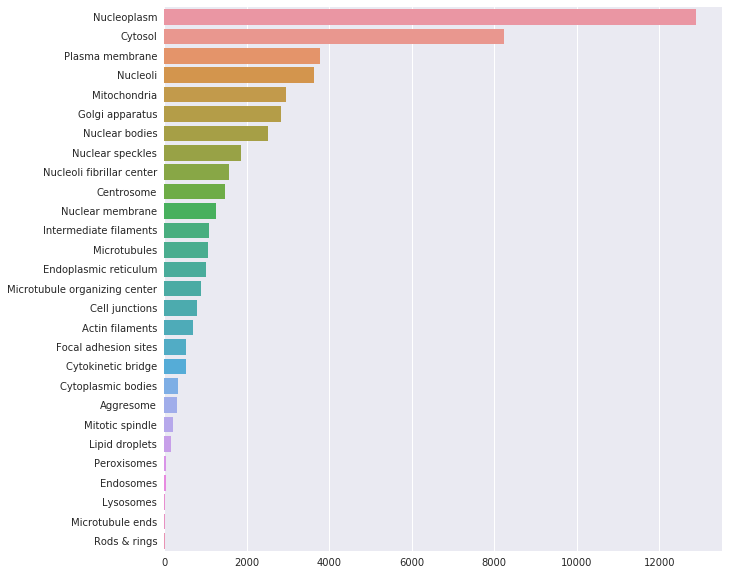

In [12]:
target_counts = train_labels.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)

Things to improve:
1. First convolutional layer 
    * How many channels to start with?
    * What should the kernel size (size of window) be?
    * Strides - does (1,1) make sense?
    * We chose 'relu' as the activation function, what happens if we use something else?
    * Input_shape, should we stick with 512x512? Make it smaller? Could we use an online processing tool to use the full size images? Would this make a difference?
    * Keras takes care of declaring any weights or bias variables - in Tensorflow you need to declare these explicitly. What are the advantages of declaring them explicitly?
2. Maxpooling - should the window size be different?
3. More convolution layers? What should the architecture be?
4. Dense
    * How many nodes should there be? Different than 64?
    * Different activation function?
    * How exactly is the last layer producing a prediction? Can it predict more than one? Is it predicting for all 28 possibilities?
5. This model does not have a Dropout layer, should we add one? How does it work?
6. What improvements can we make to model.compile? I just put in baseline values that should be changed. Defenitly need to change the accuracy measure.
7. model.fit -> What are the best params to set for performance? How does it affect accuracy? Do we want to use a callback? And this needs to be made into a k-fold cross validation split instead of an arbitrary split. Can we use multiprocessing?

In [13]:
# Splitting the data -> this needs to be changed to splitting k-fold
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(playing, train_labels,
                                                    test_size=0.2, random_state=42)

print("x_train" + str(x_train[0]))

print("x_test" + str(x_test[0]))

print("y_train:")
y_train = y_train.drop(["Id", "Target"], axis=1)
print(y_train.head(1))

print("y_test:")
y_test = y_test.drop(["Id", "Target"], axis=1)

print(y_test.head(1))

x_train[[  5  24  48 ...  23  26  25]
 [ 63  62 129 ...  39  35  12]
 [ 16  47 118 ...  31  15  12]
 ...
 [  2   0   0 ...  18  16  26]
 [  0   0   0 ...  43  66  15]
 [  0   0   0 ...  31  44   9]]
x_test[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y_train:
       Nucleoplasm  Nuclear membrane  Nucleoli  Nucleoli fibrillar center  \
19720            0                 0         0                          0   

       Nuclear speckles  Nuclear bodies  Endoplasmic reticulum  \
19720                 0               0                      0   

       Golgi apparatus  Peroxisomes  Endosomes      ...       \
19720                1            0          0      ...        

       Microtubule organizing center  Centrosome  Lipid droplets  \
19720                              0           0               0   

       Plasma membrane  Cell junctions  Mitochondria  Aggresome  Cytosol  \
19720                0              

In [14]:
import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import keras.backend as K

def precision(y_true, y_pred):
     """Precision metric.
     Only computes a batch-wise average of precision.
     Computes the precision, a metric for multi-label classification of
     how many selected items are relevant.
     """
     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
     precision = true_positives / (predicted_positives + K.epsilon())
     return precision

def recall(y_true, y_pred):
     """Recall metric.
     Only computes a batch-wise average of recall.
     Computes the recall, a metric for multi-label classification of
     how many relevant items are selected.
     """
     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
     recall = true_positives / (possible_positives + K.epsilon())
     return recall

def fbeta_score(y_true, y_pred, beta=1):
     """Computes the F score.
     The F score is the weighted harmonic mean of precision and recall.
     Here it is only computed as a batch-wise average, not globally.
     This is useful for multi-label classification, where input samples can be
     classified as sets of labels. By only using accuracy (precision) a model
     would achieve a perfect score by simply assigning every class to every
     input. In order to avoid this, a metric should penalize incorrect class
     assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
     computes this, as a weighted mean of the proportion of correct class
     assignments vs. the proportion of incorrect class assignments.
     With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
     correct classes becomes more important, and with beta > 1 the metric is
     instead weighted towards penalizing incorrect class assignments.
     """
     if beta < 0:
         raise ValueError('The lowest choosable beta is zero (only precision).')
     # If there are no true positives, fix the F score at 0 like sklearn.
     if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
         return 0
     p = precision(y_true, y_pred)
     r = recall(y_true, y_pred)
     bb = beta ** 2
     fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
     return fbeta_score

def fmeasure(y_true, y_pred):
     """Computes the f-measure, the harmonic mean of precision and recall.
     Here it is only computed as a batch-wise average, not globally.
     """
     return fbeta_score(y_true, y_pred, beta=1)

In [15]:
import tensorflow as tf

K_epsilon = K.epsilon()

def f1_loss(y_true, y_pred):
    
    #y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), THRESHOLD), K.floatx())
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K_epsilon)
    r = tp / (tp + fn + K_epsilon)

    f1 = 2*p*r / (p+r+K_epsilon)
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return 1-K.mean(f1)

In [18]:
# x size, y size, channels
# Only need to declare the input_shape in the first layer of CNN
input_shape = (512, 512, 1)

# Models in Keras come in two forms - sequential and fucntional API. It makes
# sense to use sequential as we can stack layers of the network in order from
# input to output.
model = Sequential()

# This is adding our first layer, which is a 2D convolutional layer. The first
# argument passed is the number of output channels. Kernel size is the window
# and strides is your movenment (x,y). Activation and input - straightforward.
model.add(Conv2D(32, kernel_size=(5,5), strides=(2,2),
                activation='relu',
                input_shape=input_shape))

# Maxpooling layer takes the max of the 'pool_size' which is the window to
# calculate the maxpooling and stride (x,y)
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Another convolution layer, this time with 64 output channels. Default stride
# in Conv2D() is (1,1) in Keras. Default strides argument in Keras is to make it
# equal to the pool size, so we can leave that out too. More pooling aftewards.
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

# Now we have built our convolutional layers in this model. We want to flatten
# output from these to enter our fully connected layers. 
model.add(Flatten())

# First we specify the size and then the activation function. Then we say to pick
# the softmax of each of the 28 possible targets.
#model.add(Dense(64, activation='relu'))
model.add(Dense(28, activation='sigmoid'))

# Compile the model and give it a loss funciton, optimizer, and metric evaluator
model.compile(loss=f1_loss,
             optimizer=keras.optimizers.Adadelta(),
             metrics=[precision, recall, fmeasure])

print(model.summary())
# Fitting the data to model -> this needs to be turned into k-fold, but this is
# just a baseline
#y_test = y_test.drop(["Id"], axis=1)
#x_test = x_test.drop(["Id"], axis=1)
print(y_train.shape)
#y_train = y_train.drop(["Id"], axis=1)

model.fit(np.array(x_train).reshape([-1,512,512,1]), np.array(y_train),
         batch_size=50,
         epochs=2,
         verbose=1,
         validation_data=(np.array(x_test).reshape([-1,512,512,1]), np.array(y_test)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 122, 122, 64)      51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 40, 40, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 102400)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 28)                2867228   
Total params: 2,919,324
Trainable params: 2,919,324
Non-trainable params: 0
_________________________________________________________________


In [ ]:
image = imread("../all/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png")
plt.imshow(image, cmap="Greens")
print(image)